# Code Quality Dataset - Feature Engineering Pipeline

In [1]:
import pandas as pd
import numpy as np
import json
import ast
import warnings
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

print("✓ Libraries imported")

✓ Libraries imported


In [2]:
input_file = "../data/raw/dataset.csv"
output_file = "../data/processed/dataset_processed.csv"

print(f"Input: {input_file}")
print(f"Output: {output_file}")

Input: ../data/raw/dataset.csv
Output: ../data/processed/dataset_processed.csv


# EDA & Feature Engineering  

In [3]:
def safe_parse(val):
    if pd.isna(val) or val == '': return None
    if isinstance(val, (dict, list, int, float)): return val
    try:
        return json.loads(val)
    except:
        try:
            return ast.literal_eval(str(val))
        except:
            return None

In [4]:
print(f"Loading data from {input_file}...")

try:
    df = pd.read_csv(input_file, low_memory=False)
    print(f"✓ Data loaded. Shape: {df.shape}")
    print(f"✓ Total columns: {len(df.columns)}")
except Exception as e:
    print(f"Error loading data: {e}")

Loading data from ../data/raw/dataset.csv...
✓ Data loaded. Shape: (3088, 79)
✓ Total columns: 79


In [5]:
df.head()

,abbreviation_density,attribute_mutations_outside_init,average_cyclomatic_complexity,average_methods_per_class,avg_line_length,boolean_expression_avg_terms,call_graph_density,classes,classes_with_inheritance,comment_code_mismatch_score,comment_lines,comment_percentage,commit_bursts,coupled_file_changes,cross_file_call_edges,decision_density,documentation_coverage,external_vs_internal_field_access_ratio,file_age_days,file_path,functions,global_usages_total,globals_declared,god_class_proxies,halstead_difficulty,halstead_effort,halstead_estimated_bugs,halstead_volume,indentation_irregularity,inter_file_coupling,large_parameter_list_indicator,lazy_class_indicator,lines_added,lines_deleted,lines_of_code,long_method_indicator,maintainability_score,max_cyclomatic_ratio,max_intra_file_call_depth,max_line_length,max_lines_per_class,max_lines_per_function,max_nesting_level,mean_cyclomatic_ratio,mean_lines_per_class,mean_lines_per_function,mean_param_entropy,methods,nesting_variance,num_authors,pep8_examples,pep8_violations,percent_lines_over_80,semantic_todo_density,smells,source_lines,test_files_found,test_function_count,test_lines,test_to_source_ratio,todo_fixme_count,todo_fixme_semantic_density,total_imports,unit_test_presence,vcs_available,vcs_top_coupled,y_FeatureEnvy,y_FormattingIssues,y_GlobalStateAbuse,y_GodClass,y_LargeParameterList,y_LazyClass,y_LongMethod,y_MisleadingComments,y_PoorDocumentation,y_ShotgunSurgery,y_SpaghettiCode,y_UnstableModule,y_UntestedCode
0,0.000,0,6.5,0.0,34.2,0.0,0.5,0,0,0.0,14,16.7,1,{},"[{'caller': 'sort_blocks', 'module': 'read_me'...",0.2727,0.0,11.0,0,D:\Gam3a\CSCI417 Machine Intelligence\Project\...,2,0,0,[],3.15,2259.11,0.2391,717.18,"{'indent_stddev': 3.77, 'irregularity_score': ...",6,False,False,83,0,84,False,75,0.259,1,102,0,35,3,0.244,0.0,31.0,0.000,0,0.5,1,"['line 14: length 80', 'line 38: length 102']",2,1.19,0.0,"[{'severity': 'MINOR', 'type': 'PoorDocumentat...",44,0,0,0,0.0,0,0.0,0,False,True,[],1,0,0,0,0,0,0,0,1,0,0,0,1
1,0.000,0,3.0,0.0,32.0,0.0,0.0,0,0,0.0,2,9.5,1,{},"[{'caller': 'pdm_build_initialize', 'module': ...",0.1429,0.0,3.0,0,D:\Gam3a\CSCI417 Machine Intelligence\Project\...,1,1,1,[],0.00,0.00,0.0000,0.00,"{'indent_stddev': 2.78, 'irregularity_score': ...",1,False,False,20,0,21,False,85,0.250,0,74,0,12,1,0.250,0.0,12.0,2.522,0,0.0,1,[],0,0.00,0.0,"[{'severity': 'MINOR', 'type': 'LargeParameter...",14,397,1932,70343,5024.5,0,0.0,3,False,True,[],0,0,0,0,1,0,0,0,1,0,0,0,0
2,0.333,0,2.0,0.0,21.0,0.0,0.0,2,2,0.0,0,0.0,1,{},"[{'caller': 'read_item', 'module': 'app'}]",0.0714,0.0,1.0,0,D:\Gam3a\CSCI417 Machine Intelligence\Project\...,0,1,1,[],0.00,0.00,0.0000,0.00,"{'indent_stddev': 2.51, 'irregularity_score': ...",1,False,False,22,0,23,False,85,0.500,0,86,0,4,1,0.500,0.0,4.0,2.522,0,0.0,1,['line 18: length 86'],1,4.35,0.0,"[{'severity': 'MINOR', 'type': 'LazyClass'}, {...",14,0,0,0,0.0,0,0.0,3,False,True,[],0,1,0,0,0,1,0,0,1,0,0,0,0
3,0.500,0,2.0,0.0,19.6,0.0,0.0,1,1,0.0,0,0.0,1,{},"[{'caller': 'read_item', 'module': 'app'}]",0.0455,0.0,1.0,0,D:\Gam3a\CSCI417 Machine Intelligence\Project\...,0,1,1,[],0.68,83.01,0.0410,122.98,"{'indent_stddev': 3.81, 'irregularity_score': ...",1,False,False,28,0,29,False,85,0.400,0,64,0,5,1,0.400,0.0,5.0,2.646,0,0.0,1,[],0,0.00,0.0,"[{'severity': 'MINOR', 'type': 'LazyClass'}, {...",22,0,0,0,0.0,0,0.0,3,False,True,[],0,0,0,0,0,1,0,0,1,0,0,0,0
4,0.500,0,2.0,0.0,19.3,0.0,0.0,1,1,0.0,0,0.0,1,{},"[{'caller': 'read_item', 'module': 'app'}]",0.0435,0.0,1.0,0,D:\Gam3a\CSCI417 Machine Intelligence\Project\...,0,1,1,[],0.00,0.00,0.0000,0.00,"{'indent_stddev': 3.82, 'irregularity_score': ...",1,False,False,30,0,31,False,85,0.400,0,65,0,5,1,0.400,0.0,5.0,2.646,0,0.0,1,[],0,0.00,0.0,"[{'severity': 'MINOR', 'type': 'LazyClass'}, {...",23,0,0,0,0.0,0,0.0,4,False,True,[],0,0,0,0,0,1,0,0,1,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 79 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   abbreviation_density                     3088 non-null   float64
 1   attribute_mutations_outside_init         3088 non-null   int64  
 2   average_cyclomatic_complexity            3088 non-null   float64
 3   average_methods_per_class                3088 non-null   float64
 4   avg_line_length                          3088 non-null   float64
 5   boolean_expression_avg_terms             3088 non-null   float64
 6   call_graph_density                       3088 non-null   float64
 7   classes                                  3088 non-null   int64  
 8   classes_with_inheritance                 3088 non-null   int64  
 9   comment_code_mismatch_score              3088 non-null   float64
 10  comment_lines                            3088 no

In [7]:
# Define column groups
json_cols = ['coupled_file_changes', 'cross_file_call_edges', 'smells', 'pep8_examples', 'indentation_irregularity', 'god_class_proxies', 'pep8_violations']

# Parse JSON columns directly
print("Parsing JSON columns...")
for col in json_cols:
    if col in df.columns:
        df[col] = df[col].apply(safe_parse)
        print(f"  ✓ Parsed {col}")

# Identify other types for later use
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df.select_dtypes(include=['object']).columns.tolist()
bool_cols = [c for c in df.columns if df[c].dtype == bool]

print(f"✓ Column types identified")
print(f"  Numeric columns: {len(numeric_cols)}")
print(f"  Object columns: {len(object_cols)}")

Parsing JSON columns...
  ✓ Parsed coupled_file_changes
  ✓ Parsed cross_file_call_edges
  ✓ Parsed smells
  ✓ Parsed pep8_examples
  ✓ Parsed indentation_irregularity
  ✓ Parsed god_class_proxies
  ✓ Parsed pep8_violations
✓ Column types identified
  Numeric columns: 66
  Object columns: 8


In [8]:
print("Handling missing values...")

# Fill numeric with median
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Fill categorical with 'Unknown'
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna('Unknown', inplace=True)

# Fill boolean with False
for col in df.select_dtypes(include=['bool']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(False, inplace=True)

print("✓ Missing values filled")
print(df.shape)

Handling missing values...
✓ Missing values filled
(3088, 79)


In [9]:
print("Engineering derived features...")

# 1. Complexity Score
complexity_cols = ['average_cyclomatic_complexity', 'max_cyclomatic_ratio', 'mean_cyclomatic_ratio']
available_comp = [c for c in complexity_cols if c in df.columns]
if available_comp:
    df['complexity_score'] = df[available_comp].mean(axis=1)
    print(f"  ✓ Complexity score created")

# 2. Code Health
# Weighted score of violations, maintainability, and comments
if 'maintainability_score' in df.columns:
    df['code_health'] = (
        (100 - df.get('pep8_violations', pd.Series(0)).fillna(0)) * 0.3 +
        df['maintainability_score'].fillna(50) * 0.4 +
        (100 - df.get('comment_code_mismatch_score', pd.Series(0)).fillna(0) * 100) * 0.3
    )
    print(f"  ✓ Code health created")

# 3. Documentation Quality
if 'documentation_coverage' in df.columns:
    df['doc_quality'] = (
        df['documentation_coverage'].fillna(0) * 0.5 +
        (100 - df.get('comment_percentage', pd.Series(0)).fillna(0)) * 0.5
    )
    print(f"  ✓ Documentation quality created")

# 4. Has Tests
if 'test_to_source_ratio' in df.columns:
    df['has_tests'] = (df['test_to_source_ratio'].fillna(0) > 0).astype(int)
    print(f"  ✓ Test indicator created")
else:
    df['has_tests'] = 0

# 5. Coupling Complexity
if 'inter_file_coupling' in df.columns and 'call_graph_density' in df.columns:
    df['coupling_complexity'] = (
        df['inter_file_coupling'].fillna(0) * 0.5 +
        df['call_graph_density'].fillna(0) * 0.5
    )
    print(f"  ✓ Coupling complexity created")

# 6. Smell Density
# Safe length check for list columns
def get_len(x): return len(x) if isinstance(x, list) else 0

if 'smells' in df.columns and 'lines_of_code' in df.columns:
    df['smell_density'] = df['smells'].apply(get_len) / (df['lines_of_code'].fillna(1) / 100)
    print(f"  ✓ Smell density created")

# 7. Effort Impact Ratio
if 'halstead_effort' in df.columns:
    df['effort_impact_ratio'] = (
        df['halstead_effort'].fillna(0) / 
        (df.get('halstead_estimated_bugs', pd.Series(1)).fillna(1) + 1)
    )
    print(f"  ✓ Effort impact ratio created")

# 8. File Maturity (code age and activity)
if 'file_age_days' in df.columns and 'lines_of_code' in df.columns:
    df['file_maturity'] = np.log1p(df['file_age_days'].fillna(0)) * \
                          (1 + df.get('lines_added', pd.Series(0)).fillna(0) / 
                          (df['lines_of_code'].fillna(1)))
    print(f"  ✓ File maturity created")

# 9. Code Duplication Risk (based on method repetition)
if 'mean_lines_per_function' in df.columns:
    df['code_duplication_risk'] = (
        df['mean_lines_per_function'].fillna(0) / (df['lines_of_code'].fillna(1) / 10)
    )
    print(f"  ✓ Code duplication risk created")

# 10. Testing Coverage Quality
if 'test_to_source_ratio' in df.columns and 'test_lines' in df.columns:
    df['test_quality'] = (
        df['test_to_source_ratio'].fillna(0) * 0.6 +
        (df['test_lines'].fillna(0) / (df['lines_of_code'].fillna(1) + 1)) * 0.4
    )
    print(f"  ✓ Test quality created")

print("✓ 10 derived features created")


Engineering derived features...
  ✓ Complexity score created
  ✓ Code health created
  ✓ Documentation quality created
  ✓ Test indicator created
  ✓ Coupling complexity created
  ✓ Smell density created
  ✓ Effort impact ratio created
  ✓ File maturity created
  ✓ Code duplication risk created
  ✓ Test quality created
✓ 10 derived features created


In [10]:
# All target columns (code smells detected)
target_cols = [c for c in df.columns if c.startswith('y_')]

print(f"Found {len(target_cols)} code smell indicators:")
print(target_cols)

# Create a composite target: any code smell present
if target_cols:
    df['y_any_smell'] = (df[target_cols].sum(axis=1) > 0).astype(int)
    print(f"\n✓ Composite target created: y_any_smell")
    print(f"  Code smells found: {df['y_any_smell'].sum()} / {len(df)}")


Found 13 code smell indicators:
['y_FeatureEnvy', 'y_FormattingIssues', 'y_GlobalStateAbuse', 'y_GodClass', 'y_LargeParameterList', 'y_LazyClass', 'y_LongMethod', 'y_MisleadingComments', 'y_PoorDocumentation', 'y_ShotgunSurgery', 'y_SpaghettiCode', 'y_UnstableModule', 'y_UntestedCode']

✓ Composite target created: y_any_smell
  Code smells found: 2685 / 3088


In [11]:
print("Encoding categorical features...")

# Binary encoding (Keep this for boolean features)
for col in ['unit_test_presence', 'vcs_available']:
    if col in df.columns:
        df[col] = df[col].astype(int)
        
if 'file_path' in df.columns:
    print(f"  ✓ Preserving 'file_path' for later identification")
    df['file_path'] = df['file_path'].str.replace(r'D:\\.*?\\data\\temp\\', '', regex=True)

print("✓ Categorical encoding complete file_path preserved as relative paths")

Encoding categorical features...
  ✓ Preserving 'file_path' for later identification
✓ Categorical encoding complete file_path preserved as relative paths


In [12]:
df.head()

,abbreviation_density,attribute_mutations_outside_init,average_cyclomatic_complexity,average_methods_per_class,avg_line_length,boolean_expression_avg_terms,call_graph_density,classes,classes_with_inheritance,comment_code_mismatch_score,comment_lines,comment_percentage,commit_bursts,coupled_file_changes,cross_file_call_edges,decision_density,documentation_coverage,external_vs_internal_field_access_ratio,file_age_days,file_path,functions,global_usages_total,globals_declared,god_class_proxies,halstead_difficulty,halstead_effort,halstead_estimated_bugs,halstead_volume,indentation_irregularity,inter_file_coupling,large_parameter_list_indicator,lazy_class_indicator,lines_added,lines_deleted,lines_of_code,long_method_indicator,maintainability_score,max_cyclomatic_ratio,max_intra_file_call_depth,max_line_length,max_lines_per_class,max_lines_per_function,max_nesting_level,mean_cyclomatic_ratio,mean_lines_per_class,mean_lines_per_function,mean_param_entropy,methods,nesting_variance,num_authors,pep8_examples,pep8_violations,percent_lines_over_80,semantic_todo_density,smells,source_lines,test_files_found,test_function_count,test_lines,test_to_source_ratio,todo_fixme_count,todo_fixme_semantic_density,total_imports,unit_test_presence,vcs_available,vcs_top_coupled,y_FeatureEnvy,y_FormattingIssues,y_GlobalStateAbuse,y_GodClass,y_LargeParameterList,y_LazyClass,y_LongMethod,y_MisleadingComments,y_PoorDocumentation,y_ShotgunSurgery,y_SpaghettiCode,y_UnstableModule,y_UntestedCode,complexity_score,code_health,doc_quality,has_tests,coupling_complexity,smell_density,effort_impact_ratio,file_maturity,code_duplication_risk,test_quality,y_any_smell
0,0.000,0,6.5,0.0,34.2,0.0,0.5,0,0,0.0,14,16.7,1,{},"[{'caller': 'sort_blocks', 'module': 'read_me'...",0.2727,0.0,11.0,0,awesome-python\sort.py,2,0,0,[],3.15,2259.11,0.2391,717.18,"{'indent_stddev': 3.77, 'irregularity_score': ...",6,False,False,83,0,84,False,75,0.259,1,102,0,35,3,0.244,0.0,31.0,0.000,0,0.5,1,"[line 14: length 80, line 38: length 102]",2,1.19,0.0,"[{'severity': 'MINOR', 'type': 'PoorDocumentat...",44,0,0,0,0.0,0,0.0,0,0,1,[],1,0,0,0,0,0,0,0,1,0,0,0,1,2.334333,89.4,41.65,0,3.25,3.571429,1823.186184,0.0,3.690476,0.000000,1
1,0.000,0,3.0,0.0,32.0,0.0,0.0,0,0,0.0,2,9.5,1,{},"[{'caller': 'pdm_build_initialize', 'module': ...",0.1429,0.0,3.0,0,fastapi\pdm_build.py,1,1,1,[],0.00,0.00,0.0000,0.00,"{'indent_stddev': 2.78, 'irregularity_score': ...",1,False,False,20,0,21,False,85,0.250,0,74,0,12,1,0.250,0.0,12.0,2.522,0,0.0,1,[],0,0.00,0.0,"[{'severity': 'MINOR', 'type': 'LargeParameter...",14,397,1932,70343,5024.5,0,0.0,3,0,1,[],0,0,0,0,1,0,0,0,1,0,0,0,0,1.166667,94.0,45.25,1,0.50,9.523810,0.000000,0.0,5.714286,4293.663636,1
2,0.333,0,2.0,0.0,21.0,0.0,0.0,2,2,0.0,0,0.0,1,{},"[{'caller': 'read_item', 'module': 'app'}]",0.0714,0.0,1.0,0,fastapi\docs_src\additional_responses\tutorial...,0,1,1,[],0.00,0.00,0.0000,0.00,"{'indent_stddev': 2.51, 'irregularity_score': ...",1,False,False,22,0,23,False,85,0.500,0,86,0,4,1,0.500,0.0,4.0,2.522,0,0.0,1,[line 18: length 86],1,4.35,0.0,"[{'severity': 'MINOR', 'type': 'LazyClass'}, {...",14,0,0,0,0.0,0,0.0,3,0,1,[],0,1,0,0,0,1,0,0,1,0,0,0,0,1.000000,93.7,50.00,0,0.50,13.043478,0.000000,0.0,1.739130,0.000000,1
3,0.500,0,2.0,0.0,19.6,0.0,0.0,1,1,0.0,0,0.0,1,{},"[{'caller': 'read_item', 'module': 'app'}]",0.0455,0.0,1.0,0,fastapi\docs_src\additional_responses\tutorial...,0,1,1,[],0.68,83.01,0.0410,122.98,"{'indent_stddev': 3.81, 'irregularity_score': ...",1,False,False,28,0,29,False,85,0.400,0,64,0,5,1,0.400,0.0,5.0,2.646,0,0.0,1,[],0,0.00,0.0,"[{'severity': 'MINOR', 'type': 'LazyClass'}, {...",22,0,0,0,0.0,0,0.0,3,0,1,[],0,0,0,0,0,1,0,0,1,0,0,0,0,0.933333,94.0,50.00,0,0.50,6.896552,79.740634,0.0,1.724138,0.000000,1
4,0.500,0,2.0,0.0,19.3,0.0,0.0,1,1,0.0,0,0.0,1,{},"[{'caller': 'read_item', 'module': 'app'}]",0.0435,0.0,1.0,0,fastapi\docs_src\additional_responses\tutorial...,0,1,1,[],0.00,0.00,0.0000,0.00,"{'indent_stddev': 3.82, 'irregularity_score': ...",1,False,Fal

In [ ]:
print("Handling outliers...")
numeric = df.select_dtypes(include=[np.number]).columns
count = 0

for col in numeric:
    # Skip one-hot columns and targets
    if col.startswith('y_'):
        continue
        
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 3 * IQR
    upper = Q3 + 3 * IQR
    
    # Cap values
    if ((df[col] < lower) | (df[col] > upper)).any():
        df[col] = df[col].clip(lower=lower, upper=upper)
        count += 1

print(f"✓ Outliers capped in {count} columns")

Handling outliers...
✓ Outliers capped in 51 columns


Analyzing Feature-Target Correlations...
Number of targets: 14
Number of features: 65


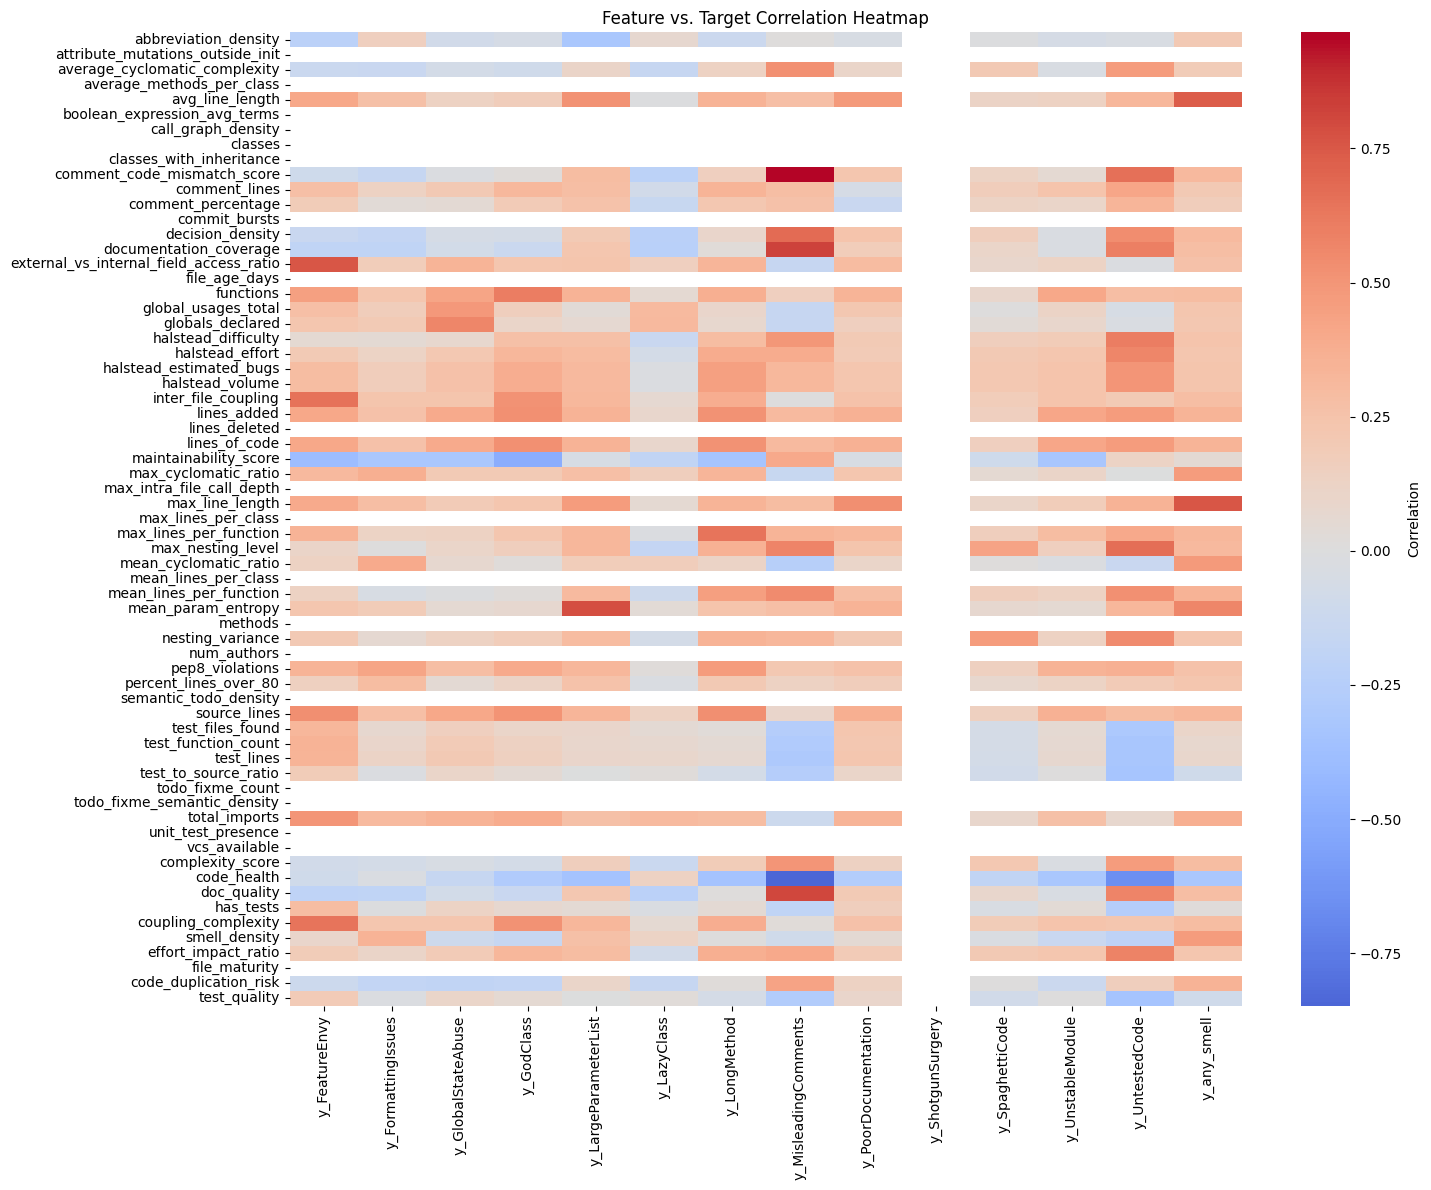


DETAILED ANALYSIS PER TARGET (WEAKEST CORRELATIONS)

🎯 ANALYSIS FOR: y_FeatureEnvy
📉 Weakest Correlations (Nearest to Zero):
halstead_difficulty                        0.054384
complexity_score                          -0.086136
code_health                               -0.089827
smell_density                              0.093953
comment_code_mismatch_score               -0.099992
max_nesting_level                          0.112901
code_duplication_risk                     -0.114648
average_cyclomatic_complexity             -0.131243
mean_lines_per_function                    0.135151
mean_cyclomatic_ratio                      0.135392
decision_density                          -0.141523
percent_lines_over_80                      0.144873
effort_impact_ratio                        0.180236
test_to_source_ratio                       0.181177
comment_percentage                         0.186495
documentation_coverage                    -0.188619
test_quality                              

In [19]:
## 10. Correlation Analysis (Focus on Weakest Correlations)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

print("Analyzing Feature-Target Correlations...")

# 1. Identify groups
target_cols = [c for c in df.columns if c.startswith('y_')]
feature_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in target_cols]
target_cols_len = len(target_cols)
feature_cols_len = len(feature_cols)
print(f"Number of targets: {target_cols_len}")
print(f"Number of features: {feature_cols_len}")

# Store all weak features to find the most common ones later
all_weak_features = []

if target_cols and feature_cols:
    # 2. Calculate Correlation Matrix
    full_corr = df[feature_cols + target_cols].corr()
    target_corr_matrix = full_corr.loc[feature_cols, target_cols]

    # 3. Plot Heatmap (Overview)
    plt.figure(figsize=(15, 12))
    sns.heatmap(target_corr_matrix, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'})
    plt.title('Feature vs. Target Correlation Heatmap')
    plt.tight_layout()
    plt.show()

    # 4. Detailed Analysis per Target
    print("\n" + "="*60)
    print("DETAILED ANALYSIS PER TARGET (WEAKEST CORRELATIONS)")
    print("="*60)

    for target in target_cols:
        print(f"\n🎯 ANALYSIS FOR: {target}")
        
        # -----------------------------------------------------------------
        # KEY CHANGE: Sort by ABSOLUTE value (Nearest to Zero first)
        # -----------------------------------------------------------------
        # 1. Get correlations
        corrs = target_corr_matrix[target].dropna()
        
        # 2. Create a temporary Series with absolute values to sort
        # 3. Sort ascending (0.001 first, 0.9 last)
        # 4. Use the index to reorder the original correlations
        sorted_by_weakness = corrs.iloc[corrs.abs().argsort()]

        # Top Weakest (Closest to Zero)
        top_weak = sorted_by_weakness.head(feature_cols_len)
        
        print("📉 Weakest Correlations (Nearest to Zero):")
        print(top_weak.to_string())
        
        # Add to our global list
        all_weak_features.extend(top_weak.index.tolist())

    # 5. FIND AND PLOT THE "UNIVERSAL WEAK FEATURES"
    print("\n" + "="*60)
    print("ANALYSIS OF REPEATED WEAK FEATURES")
    print("="*60)
    
    # Count frequency of each feature in the weak lists
    feature_counts = Counter(all_weak_features)
    most_common_weak = feature_counts.most_common(feature_cols_len)
    
    print("Features that most frequently appear as WEAK correlations:")
    for feat, count in most_common_weak:
        print(f"  - {feat}: appears in {count} targets")

else:
    print("⚠ No targets or numeric features found for correlation analysis.")


In [17]:
df.head()

,abbreviation_density,attribute_mutations_outside_init,average_cyclomatic_complexity,average_methods_per_class,avg_line_length,boolean_expression_avg_terms,call_graph_density,classes,classes_with_inheritance,comment_code_mismatch_score,comment_lines,comment_percentage,commit_bursts,coupled_file_changes,cross_file_call_edges,decision_density,documentation_coverage,external_vs_internal_field_access_ratio,file_age_days,file_path,functions,global_usages_total,globals_declared,god_class_proxies,halstead_difficulty,halstead_effort,halstead_estimated_bugs,halstead_volume,indentation_irregularity,inter_file_coupling,large_parameter_list_indicator,lazy_class_indicator,lines_added,lines_deleted,lines_of_code,long_method_indicator,maintainability_score,max_cyclomatic_ratio,max_intra_file_call_depth,max_line_length,max_lines_per_class,max_lines_per_function,max_nesting_level,mean_cyclomatic_ratio,mean_lines_per_class,mean_lines_per_function,mean_param_entropy,methods,nesting_variance,num_authors,pep8_examples,pep8_violations,percent_lines_over_80,semantic_todo_density,smells,source_lines,test_files_found,test_function_count,test_lines,test_to_source_ratio,todo_fixme_count,todo_fixme_semantic_density,total_imports,unit_test_presence,vcs_available,vcs_top_coupled,y_FeatureEnvy,y_FormattingIssues,y_GlobalStateAbuse,y_GodClass,y_LargeParameterList,y_LazyClass,y_LongMethod,y_MisleadingComments,y_PoorDocumentation,y_ShotgunSurgery,y_SpaghettiCode,y_UnstableModule,y_UntestedCode,complexity_score,code_health,doc_quality,has_tests,coupling_complexity,smell_density,effort_impact_ratio,file_maturity,code_duplication_risk,test_quality,y_any_smell
0,0.000,0,6.5,0.0,34.2,0.0,0.0,0,0,0.0,8,8.4,1,{},"[{'caller': 'sort_blocks', 'module': 'read_me'...",0.2727,0.0,11.0,0,awesome-python\sort.py,2,0,0,[],3.15,2259.11,0.2391,717.18,"{'indent_stddev': 3.77, 'irregularity_score': ...",6,False,False,83,0,84,False,75,0.259,0,102,0,35,3,0.244,0.0,31.0,0.000,0,0.5,1,"[line 14: length 80, line 38: length 102]",2,1.19,0.0,"[{'severity': 'MINOR', 'type': 'PoorDocumentat...",44,0,0,0,0.000,0,0.0,0,0,1,[],1,0,0,0,0,0,0,0,1,0,0,0,1,2.334333,89.4,41.65,0,3.25,3.571429,1823.186184,0.0,3.690476,0.000000,1
1,0.000,0,3.0,0.0,32.0,0.0,0.0,0,0,0.0,2,8.4,1,{},"[{'caller': 'pdm_build_initialize', 'module': ...",0.1429,0.0,3.0,0,fastapi\pdm_build.py,1,1,1,[],0.00,0.00,0.0000,0.00,"{'indent_stddev': 2.78, 'irregularity_score': ...",1,False,False,20,0,21,False,85,0.250,0,74,0,12,1,0.250,0.0,12.0,2.522,0,0.0,1,[],0,0.00,0.0,"[{'severity': 'MINOR', 'type': 'LargeParameter...",14,8,20,792,18.376,0,0.0,3,0,1,[],0,0,0,0,1,0,0,0,1,0,0,0,0,1.166667,94.0,45.25,1,0.50,9.523810,0.000000,0.0,5.714286,16.137822,1
2,0.333,0,2.0,0.0,21.0,0.0,0.0,0,0,0.0,0,0.0,1,{},"[{'caller': 'read_item', 'module': 'app'}]",0.0714,0.0,1.0,0,fastapi\docs_src\additional_responses\tutorial...,0,1,1,[],0.00,0.00,0.0000,0.00,"{'indent_stddev': 2.51, 'irregularity_score': ...",1,False,False,22,0,23,False,85,0.500,0,86,0,4,1,0.500,0.0,4.0,2.522,0,0.0,1,[line 18: length 86],1,4.35,0.0,"[{'severity': 'MINOR', 'type': 'LazyClass'}, {...",14,0,0,0,0.000,0,0.0,3,0,1,[],0,1,0,0,0,1,0,0,1,0,0,0,0,1.000000,93.7,50.00,0,0.50,13.043478,0.000000,0.0,1.739130,0.000000,1
3,0.500,0,2.0,0.0,19.6,0.0,0.0,0,0,0.0,0,0.0,1,{},"[{'caller': 'read_item', 'module': 'app'}]",0.0455,0.0,1.0,0,fastapi\docs_src\additional_responses\tutorial...,0,1,1,[],0.68,83.01,0.0410,122.98,"{'indent_stddev': 3.81, 'irregularity_score': ...",1,False,False,28,0,29,False,85,0.400,0,64,0,5,1,0.400,0.0,5.0,2.646,0,0.0,1,[],0,0.00,0.0,"[{'severity': 'MINOR', 'type': 'LazyClass'}, {...",22,0,0,0,0.000,0,0.0,3,0,1,[],0,0,0,0,0,1,0,0,1,0,0,0,0,0.933333,94.0,50.00,0,0.50,6.896552,79.740634,0.0,1.724138,0.000000,1
4,0.500,0,2.0,0.0,19.3,0.0,0.0,0,0,0.0,0,0.0,1,{},"[{'caller': 'read_item', 'module': 'app'}]",0.0435,0.0,1.0,0,fastapi\docs_src\additional_responses\tutorial...,0,1,1,[],0.00,0.00,0.0000,0.00,"{'indent_stddev': 3.82, 'irregularity_score': ...",1,False,False,3

In [18]:
df.shape

(3088, 90)